## Name: Zach Balgut Tan zb2362
## Assignment: IEOR 4572 Project

# Imports


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import Dataset
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEOR4572 Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEOR4572 Project/test.csv')

required_cols1 = ['Product_Info_2','Product_Info_4','Ins_Age','Ht','Wt','BMI','Employment_Info_1','InsuredInfo_3',
                 'Insurance_History_1','Insurance_History_2','Insurance_History_3','Insurance_History_4',
                 'Insurance_History_7','Insurance_History_8','Insurance_History_9','Family_Hist_1','Family_Hist_2','Family_Hist_3','Family_Hist_4',
                 'Family_Hist_5','Medical_History_1','Medical_History_2','Response']
required_cols2 = ['Product_Info_2','Product_Info_4','Ins_Age','Ht','Wt','BMI','Employment_Info_1','InsuredInfo_3',
                 'Insurance_History_1','Insurance_History_2','Insurance_History_3','Insurance_History_4',
                 'Insurance_History_7','Insurance_History_8','Insurance_History_9','Family_Hist_1','Family_Hist_2','Family_Hist_3','Family_Hist_4',
                 'Family_Hist_5','Medical_History_1','Medical_History_2']

train = train[required_cols1]
test = test[required_cols2]

In [4]:
# Display the first few rows of the dataframe
print("First 5 rows of the dataframe:\n")
display(train.head())

# Display information about the dataframe, including data types and non-null counts
print("\n\nData types and non-null counts:\n")
display(train.info())

First 5 rows of the dataframe:



,Product_Info_2,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,InsuredInfo_3,Insurance_History_1,Insurance_History_2,...,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Response
0,D3,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,6,1,1,...,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,8
1,A1,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,6,2,1,...,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,4
2,E1,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,8,2,1,...,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,8
3,D4,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,8,2,1,...,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,8
4,D2,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,6,2,1,...,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,8




Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_2       59381 non-null  object 
 1   Product_Info_4       59381 non-null  float64
 2   Ins_Age              59381 non-null  float64
 3   Ht                   59381 non-null  float64
 4   Wt                   59381 non-null  float64
 5   BMI                  59381 non-null  float64
 6   Employment_Info_1    59362 non-null  float64
 7   InsuredInfo_3        59381 non-null  int64  
 8   Insurance_History_1  59381 non-null  int64  
 9   Insurance_History_2  59381 non-null  int64  
 10  Insurance_History_3  59381 non-null  int64  
 11  Insurance_History_4  59381 non-null  int64  
 12  Insurance_History_7  59381 non-null  int64  
 13  Insurance_History_8  59381 non-null  int64  
 14  Insurance_History_9  59381 non-null  int64  
 15  F

None

# Preprocessing Data

- Sum up Family_History
- use Medical_History_2 to impute Medical History 1
- Sum up Insurance_History 1 2 3 4 7 8 9

Categorical: Product_Info_2

Numerical: Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, InsuredInfo_3, Insurance_History, Family_Hist, Medical_History_1

Target: Response

## Handling Missing Values

In [5]:
train = train.copy()

# Delete missing rows of Employment_Info_1
train = train.dropna(subset=['Employment_Info_1'])

# Sum up Insurance_History 1 thorugh 9 and create new variable called Insurance_History
train['Insurance_History'] = train['Insurance_History_1'] + train['Insurance_History_2'] + train['Insurance_History_3'] + train['Insurance_History_4'] + train['Insurance_History_7'] + train['Insurance_History_8'] + train['Insurance_History_9']

# Sum up Family_Hist 1 through 5 and create new variable called Family_Hist
family_hist_cols = ['Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']
train['Family_Hist'] = train[family_hist_cols].fillna(0).sum(axis=1)

# Use mean Medical_Hist_2 to impute Medical_Hist_1
train['Medical_History_1'] = train['Medical_History_1'].fillna(train['Medical_History_2'].mean())

train = train.drop(['Family_Hist_1','Family_Hist_2', 'Family_Hist_3','Family_Hist_4','Family_Hist_5','Insurance_History_1','Insurance_History_2','Insurance_History_3','Insurance_History_4',
                 'Insurance_History_7','Insurance_History_8','Insurance_History_9', 'Medical_History_2'], axis = 1)

display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59362 entries, 0 to 59380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Info_2     59362 non-null  object 
 1   Product_Info_4     59362 non-null  float64
 2   Ins_Age            59362 non-null  float64
 3   Ht                 59362 non-null  float64
 4   Wt                 59362 non-null  float64
 5   BMI                59362 non-null  float64
 6   Employment_Info_1  59362 non-null  float64
 7   InsuredInfo_3      59362 non-null  int64  
 8   Medical_History_1  59362 non-null  float64
 9   Response           59362 non-null  int64  
 10  Insurance_History  59362 non-null  int64  
 11  Family_Hist        59362 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 5.9+ MB


None

In [6]:
test = test.copy()

# Delete missing rows of Employment_Info_1
test = test.dropna(subset=['Employment_Info_1'])

# Sum up Insurance_History 1 thorugh 9 and create new variable called
test['Insurance_History'] = test['Insurance_History_1'] + test['Insurance_History_2'] + test['Insurance_History_3'] + test['Insurance_History_4'] + test['Insurance_History_7'] + test['Insurance_History_8'] + test['Insurance_History_9']

# Sum up Family_Hist 1 through 5 and create new variable called Family_Hist
family_hist_cols = ['Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']
test['Family_Hist'] = test[family_hist_cols].fillna(0).sum(axis=1)

# Use mean Medical_Hist_2 to impute Medical_Hist_1
test['Medical_History_1'] = test['Medical_History_1'].fillna(test['Medical_History_2'].mean())

test = test.drop(['Family_Hist_1','Family_Hist_2', 'Family_Hist_3','Family_Hist_4','Family_Hist_5','Insurance_History_1','Insurance_History_2','Insurance_History_3','Insurance_History_4',
                 'Insurance_History_7','Insurance_History_8','Insurance_History_9', 'Medical_History_2'], axis = 1)

display(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19762 entries, 0 to 19764
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Info_2     19762 non-null  object 
 1   Product_Info_4     19762 non-null  float64
 2   Ins_Age            19762 non-null  float64
 3   Ht                 19762 non-null  float64
 4   Wt                 19762 non-null  float64
 5   BMI                19762 non-null  float64
 6   Employment_Info_1  19762 non-null  float64
 7   InsuredInfo_3      19762 non-null  int64  
 8   Medical_History_1  19762 non-null  float64
 9   Insurance_History  19762 non-null  int64  
 10  Family_Hist        19762 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.8+ MB


None

In [7]:
display(train.head())

,Product_Info_2,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,InsuredInfo_3,Medical_History_1,Response,Insurance_History,Family_Hist
0,D3,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,6,4.000000,8,10,3.124825
1,A1,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,6,5.000000,4,13,2.272913
2,E1,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,8,10.000000,8,15,3.529700
3,D4,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,8,0.000000,8,15,3.772403
4,D2,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,6,253.993481,8,15,2.872219


## Data Transformation

### Normalization

In [8]:
# Normalization of Numeric Variables
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns to normalize, excluding 'Response' and 'Product_Info_2' (object type)
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Response' from normalization as it is the target variable
if 'Response' in numeric_cols:
    numeric_cols.remove('Response')

scaler = MinMaxScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

print("Numeric columns normalized using Min-Max Scaling.")

print("\nFirst 5 rows of the normalized DataFrame:")
display(train.head())

print("\n\nData types and non-null counts after normalization:")
display(train.info())

Numeric columns normalized using Min-Max Scaling.

First 5 rows of the normalized DataFrame:


,Product_Info_2,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,InsuredInfo_3,Medical_History_1,Response,Insurance_History,Family_Hist
0,D3,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.5,0.015748,8,0.181818,0.532511
1,A1,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.5,0.019686,4,0.454545,0.319010
2,E1,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0.7,0.039371,8,0.636364,0.633979
3,D4,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0.7,0.000000,8,0.636364,0.694804
4,D2,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0.5,1.000000,8,0.636364,0.469205




Data types and non-null counts after normalization:
<class 'pandas.core.frame.DataFrame'>
Index: 59362 entries, 0 to 59380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Info_2     59362 non-null  object 
 1   Product_Info_4     59362 non-null  float64
 2   Ins_Age            59362 non-null  float64
 3   Ht                 59362 non-null  float64
 4   Wt                 59362 non-null  float64
 5   BMI                59362 non-null  float64
 6   Employment_Info_1  59362 non-null  float64
 7   InsuredInfo_3      59362 non-null  float64
 8   Medical_History_1  59362 non-null  float64
 9   Response           59362 non-null  int64  
 10  Insurance_History  59362 non-null  float64
 11  Family_Hist        59362 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 5.9+ MB


None

In [9]:
# Normalization of Numeric Variables
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns to normalize, excluding 'Response' and 'Product_Info_2' (object type)
numeric_cols = test.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Response' from normalization as it is the target variable
if 'Response' in numeric_cols:
    numeric_cols.remove('Response')

scaler = MinMaxScaler()
test[numeric_cols] = scaler.fit_transform(test[numeric_cols])

print("Numeric columns normalized using Min-Max Scaling.")

print("\nFirst 5 rows of the normalized DataFrame:")
display(test.head())

print("\n\nData types and non-null counts after normalization:")
display(test.info())

Numeric columns normalized using Min-Max Scaling.

First 5 rows of the normalized DataFrame:


,Product_Info_2,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,InsuredInfo_3,Medical_History_1,Insurance_History,Family_Hist
0,D3,0.487179,0.630769,0.666667,0.321053,0.415894,0.150,1.0,0.008007,0.6,0.884843
1,A2,0.076923,0.646154,0.583333,0.286842,0.429975,0.000,0.7,0.020017,0.1,0.594391
2,D3,0.144667,0.600000,0.555556,0.297368,0.467738,0.143,0.2,0.012010,0.6,0.869336
3,A1,0.151709,0.538462,0.472222,0.231579,0.432164,0.210,0.2,1.000000,0.2,0.616967
4,A1,0.076923,0.307692,0.500000,0.205263,0.367699,0.085,0.7,0.072063,0.6,0.477823




Data types and non-null counts after normalization:
<class 'pandas.core.frame.DataFrame'>
Index: 19762 entries, 0 to 19764
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Info_2     19762 non-null  object 
 1   Product_Info_4     19762 non-null  float64
 2   Ins_Age            19762 non-null  float64
 3   Ht                 19762 non-null  float64
 4   Wt                 19762 non-null  float64
 5   BMI                19762 non-null  float64
 6   Employment_Info_1  19762 non-null  float64
 7   InsuredInfo_3      19762 non-null  float64
 8   Medical_History_1  19762 non-null  float64
 9   Insurance_History  19762 non-null  float64
 10  Family_Hist        19762 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.8+ MB


None

### One Hot Encoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
prod_info2_encoded = encoder.fit_transform(train[['Product_Info_2']])

# Create a DataFrame from the encoded data with appropriate column names
# Pass the feature name as a list to get_feature_names_out
encoded_df = pd.DataFrame(prod_info2_encoded, columns=encoder.get_feature_names_out(['Product_Info_2']))

# Reset the index of train before concatenating to avoid misalignment due to previous dropna
train_reset = train.reset_index(drop=True)

# Drop original categorical column from main DataFrame
train_reset = train_reset.drop('Product_Info_2', axis=1)

# Concatenate the one-hot encoded DataFrame with the main DataFrame
train = pd.concat([train_reset, encoded_df], axis=1)

print("DataFrame after one-hot encoding:")
display(train.head())

DataFrame after one-hot encoding:


,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,InsuredInfo_3,Medical_History_1,Response,Insurance_History,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.5,0.015748,8,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.5,0.019686,4,0.454545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0.7,0.039371,8,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0.7,0.000000,8,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0.5,1.000000,8,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
prod_info2_encoded = encoder.fit_transform(test[['Product_Info_2']])

# Create a DataFrame from the encoded data with appropriate column names
# Pass the feature name as a list to get_feature_names_out
encoded_df = pd.DataFrame(prod_info2_encoded, columns=encoder.get_feature_names_out(['Product_Info_2']))

# Reset the index of train before concatenating to avoid misalignment due to previous dropna
test_reset = test.reset_index(drop=True)

# Drop original categorical column from main DataFrame
test_reset = test_reset.drop('Product_Info_2', axis=1)

# Concatenate the one-hot encoded DataFrame with the main DataFrame
test = pd.concat([test_reset, encoded_df], axis=1)

print("DataFrame after one-hot encoding:")
display(test.head())

DataFrame after one-hot encoding:


,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,InsuredInfo_3,Medical_History_1,Insurance_History,Family_Hist,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,0.487179,0.630769,0.666667,0.321053,0.415894,0.150,1.0,0.008007,0.6,0.884843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.076923,0.646154,0.583333,0.286842,0.429975,0.000,0.7,0.020017,0.1,0.594391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.144667,0.600000,0.555556,0.297368,0.467738,0.143,0.2,0.012010,0.6,0.869336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.151709,0.538462,0.472222,0.231579,0.432164,0.210,0.2,1.000000,0.2,0.616967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.076923,0.307692,0.500000,0.205263,0.367699,0.085,0.7,0.072063,0.6,0.477823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
display(train.head())

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,InsuredInfo_3,Medical_History_1,Response,Insurance_History,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.5,0.015748,8,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.5,0.019686,4,0.454545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0.7,0.039371,8,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0.7,0.000000,8,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0.5,1.000000,8,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Target Variable

In [13]:
# Response: 1 to 6 as not risky, 7 to 8 as risky

In [14]:
train['Risk_Category'] = train['Response'].apply(lambda x: 'not risky' if x >= 1 and x <= 6 else 'risky')

# Calculate and display the class distribution of the target variable
target_distribution = train['Risk_Category'].value_counts()
print("Class distribution of the target variable:")
display(target_distribution)

Class distribution of the target variable:


,count
Risk_Category,
not risky,31846
risky,27516


In [15]:
train = train.drop('Response', axis=1)

# Model Run

# Model Evaluation

In [16]:
train.head()

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,InsuredInfo_3,Medical_History_1,Insurance_History,Family_Hist,...,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Risk_Category
0,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.5,0.015748,0.181818,0.532511,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,risky
1,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.5,0.019686,0.454545,0.319010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not risky
2,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0.7,0.039371,0.636364,0.633979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,risky
3,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0.7,0.000000,0.636364,0.694804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,risky
4,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0.5,1.000000,0.636364,0.469205,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,risky


# Task
Separate the features (X) and the target variable (y, 'Risk_Category') from the processed 'train' DataFrame. Then, split these into training and validation sets (X_train, X_val, y_train, y_val) to prepare for model training and evaluation, ensuring the target variable is numerically encoded.

**Reasoning**:
I will separate the features (X) and the target variable (y) from the 'train' DataFrame, convert the target variable to numerical values, and then split the data into training and validation sets using `train_test_split`.



In [17]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target variable (y)
X = train.drop('Risk_Category', axis=1)
y = train['Risk_Category']

# 2. Convert 'Risk_Category' target variable into a numerical format
y = y.map({'not risky': 0, 'risky': 1})

# 3. and 4. Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features (X) and target (y) separated.")
print("Target variable 'Risk_Category' converted to numerical (0 for 'not risky', 1 for 'risky').")
print("Data split into training and validation sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

Features (X) and target (y) separated.
Target variable 'Risk_Category' converted to numerical (0 for 'not risky', 1 for 'risky').
Data split into training and validation sets.
X_train shape: (47489, 28)
X_val shape: (11873, 28)
y_train shape: (47489,)
y_val shape: (11873,)


## Run Logistic Regression Model

### Subtask:
Train a Logistic Regression model on the training data and evaluate its performance on the validation set using appropriate metrics.


**Reasoning**:
I need to import `LogisticRegression` and evaluation metrics, instantiate the model, train it on `X_train` and `y_train`, make predictions on `X_val`, and then calculate and print accuracy, precision, recall, and F1-score.



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 3. Instantiate a LogisticRegression model
model = LogisticRegression(max_iter=1000, random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Make predictions on the validation set
y_pred = model.predict(X_val)

# 6. Calculate and print evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Logistic Regression Model Performance on Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Logistic Regression Model Performance on Validation Set:
Accuracy: 0.7097
Precision: 0.6763
Recall: 0.6885
F1-Score: 0.6824


## Run Decision Tree Model

### Subtask:
Train a Decision Tree model on the training data and evaluate its performance on the validation set.


**Reasoning**:
I will import the necessary Decision Tree classifier and evaluation metrics, then instantiate, train, and evaluate the model on the provided data, as per the instructions.



In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Instantiate a DecisionTreeClassifier model
model_dt = DecisionTreeClassifier(random_state=42)

# 3. Train the Decision Tree model
model_dt.fit(X_train, y_train)

# 4. Make predictions on the validation set
y_pred_dt = model_dt.predict(X_val)

# 5. Calculate and print evaluation metrics
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

print("Decision Tree Model Performance on Validation Set:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

Decision Tree Model Performance on Validation Set:
Accuracy: 0.6596
Precision: 0.6190
Recall: 0.6462
F1-Score: 0.6323


## Run Random Forest Model

### Subtask:
Train a Random Forest classifier on the training data and evaluate its performance on the validation set.



**Reasoning**:
Now I will generate the Python code to train a Random Forest classifier, make predictions on the validation set, and evaluate its performance using accuracy, precision, recall, and F1-score.



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Instantiate a RandomForestClassifier model
model_rf = RandomForestClassifier(random_state=42)

# 3. Train the Random Forest model
model_rf.fit(X_train, y_train)

# 4. Make predictions on the validation set
y_pred_rf = model_rf.predict(X_val)

# 5. Calculate and print evaluation metrics
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print("Random Forest Model Performance on Validation Set:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Random Forest Model Performance on Validation Set:
Accuracy: 0.7273
Precision: 0.6808
Recall: 0.7492
F1-Score: 0.7133


## Run XGBoost Model

### Subtask:
Train an XGBoost classifier on the training data and evaluate its performance on the validation set.


#### Reasoning:
I will import `XGBClassifier` and evaluation metrics, instantiate the model, train it on `X_train` and `y_train`, make predictions on `X_val`, and then calculate and print accuracy, precision, recall, and F1-score.

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Instantiate an XGBClassifier model
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 3. Train the XGBoost model
model_xgb.fit(X_train, y_train)

# 4. Make predictions on the validation set
y_pred_xgb = model_xgb.predict(X_val)

# 5. Calculate and print evaluation metrics
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
precision_xgb = precision_score(y_val, y_pred_xgb)
recall_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)

print("XGBoost Model Performance on Validation Set:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:21:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Performance on Validation Set:
Accuracy: 0.7344
Precision: 0.6861
Recall: 0.7627
F1-Score: 0.7224


**Reasoning**:
The previous code generated a UserWarning because the `use_label_encoder` parameter is deprecated in the current version of XGBoost. Removing this parameter will resolve the warning without affecting the model's functionality in this context.



In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Instantiate an XGBClassifier model
model_xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# 3. Train the XGBoost model
model_xgb.fit(X_train, y_train)

# 4. Make predictions on the validation set
y_pred_xgb = model_xgb.predict(X_val)

# 5. Calculate and print evaluation metrics
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
precision_xgb = precision_score(y_val, y_pred_xgb)
recall_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)

print("XGBoost Model Performance on Validation Set:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

XGBoost Model Performance on Validation Set:
Accuracy: 0.7344
Precision: 0.6861
Recall: 0.7627
F1-Score: 0.7224


## Run Deep Learning Model

### Subtask:
Build and train a simple Deep Learning model (e.g., a Multi-Layer Perceptron) using a library like Keras or TensorFlow, and evaluate its performance on the validation set.


## Run Deep Learning Model

### Subtask:
Build and train a simple Deep Learning model (e.g., a Multi-Layer Perceptron) using a library like Keras or TensorFlow, and evaluate its performance on the validation set.


In [23]:
import sys
!{sys.executable} -m pip install torch
print("PyTorch installed successfully.")

PyTorch installed successfully.


**Reasoning**:
PyTorch has been successfully installed. Now, I need to prepare the data for the Deep Learning model by converting the `X_train`, `X_val`, `y_train`, and `y_val` from pandas DataFrames/Series to PyTorch tensors.



In [24]:
import torch

# Convert DataFrames/Series to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

print("Data successfully converted to PyTorch tensors.")
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_val_tensor shape: {X_val_tensor.shape}")
print(f"y_val_tensor shape: {y_val_tensor.shape}")

Data successfully converted to PyTorch tensors.
X_train_tensor shape: torch.Size([47489, 28])
y_train_tensor shape: torch.Size([47489, 1])
X_val_tensor shape: torch.Size([11873, 28])
y_val_tensor shape: torch.Size([11873, 1])


**Reasoning**:
Now that the data is prepared as PyTorch tensors, the next step is to define a PyTorch deep learning model architecture. This will be a simple feedforward neural network.



In [25]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1) # Output a single value for binary classification
        self.sigmoid = nn.Sigmoid() # Apply sigmoid for binary classification output

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
input_size = X_train_tensor.shape[1]
model_pytorch = SimpleNN(input_size)

print("PyTorch Deep Learning Model defined successfully.")
print(model_pytorch)

PyTorch Deep Learning Model defined successfully.
SimpleNN(
  (layer1): Linear(in_features=28, out_features=64, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


**Reasoning**:
Now that the PyTorch model architecture is defined, the next step is to train this model using the prepared data. This involves setting up the loss function, optimizer, and then running the training loop.



In [26]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Define Loss Function and Optimizer
criterion = nn.BCELoss() # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

# 2. Train the model
num_epochs = 100

for epoch in range(num_epochs):
    model_pytorch.train() # Set model to training mode
    optimizer.zero_grad()
    outputs = model_pytorch(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("PyTorch Deep Learning Model trained successfully.")

# 3. Evaluate the model on the validation set
model_pytorch.eval() # Set model to evaluation mode
with torch.no_grad(): # Disable gradient calculation during evaluation
    y_pred_proba_pytorch = model_pytorch(X_val_tensor)
    y_pred_pytorch = (y_pred_proba_pytorch > 0.5).float() # Convert probabilities to binary predictions

    # Convert tensors to numpy arrays for scikit-learn metrics
    y_val_np = y_val_tensor.cpu().numpy()
    y_pred_pytorch_np = y_pred_pytorch.cpu().numpy()

    # Calculate and print evaluation metrics
    accuracy_pytorch = accuracy_score(y_val_np, y_pred_pytorch_np)
    precision_pytorch = precision_score(y_val_np, y_pred_pytorch_np)
    recall_pytorch = recall_score(y_val_np, y_pred_pytorch_np)
    f1_pytorch = f1_score(y_val_np, y_pred_pytorch_np)

print("\nPyTorch Deep Learning Model Performance on Validation Set:")
print(f"Accuracy: {accuracy_pytorch:.4f}")
print(f"Precision: {precision_pytorch:.4f}")
print(f"Recall: {recall_pytorch:.4f}")
print(f"F1-Score: {f1_pytorch:.4f}")


Epoch [10/100], Loss: 0.6874
Epoch [20/100], Loss: 0.6813
Epoch [30/100], Loss: 0.6713
Epoch [40/100], Loss: 0.6559
Epoch [50/100], Loss: 0.6359
Epoch [60/100], Loss: 0.6156
Epoch [70/100], Loss: 0.5980
Epoch [80/100], Loss: 0.5826
Epoch [90/100], Loss: 0.5694
Epoch [100/100], Loss: 0.5598
PyTorch Deep Learning Model trained successfully.

PyTorch Deep Learning Model Performance on Validation Set:
Accuracy: 0.7081
Precision: 0.6817
Recall: 0.6668
F1-Score: 0.6742


# Summary

Model Performance Overview
Here's a summary of the performance of all trained models on the validation set:

Logistic Regression Model:

Accuracy: 0.7097
Precision: 0.6763
Recall: 0.6885
F1-Score: 0.6824

Decision Tree Model:

Accuracy: 0.6596
Precision: 0.6190
Recall: 0.6462
F1-Score: 0.6323

Random Forest Model:

Accuracy: 0.7273
Precision: 0.6808
Recall: 0.7492
F1-Score: 0.7133

XGBoost Model:

Accuracy: 0.7344
Precision: 0.6861
Recall: 0.7627
F1-Score: 0.7224

PyTorch Deep Learning Model:

Accuracy: 0.7043
Precision: 0.6815
Recall: 0.6517
F1-Score: 0.6663

Best Performing Model
Based on the F1-Score, which provides a balance between Precision and Recall, the XGBoost Model is the best performing model with an F1-Score of 0.7224. It also shows the highest Accuracy, Recall, and a strong Precision.

Insights or Next Steps
The XGBoost model demonstrates the best overall performance, indicating its suitability for this classification task.
Further hyperparameter tuning for the XGBoost model could potentially yield even better results.
While the Deep Learning model performed well, its F1-Score was slightly lower than XGBoost. More complex architectures or extensive hyperparameter optimization might improve its performance.
The Logistic Regression and Random Forest models also showed competitive performance, but XGBoost slightly outperformed them.

# Visualizations

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.709677,0.676347,0.688546,0.682392
1,Decision Tree,0.659564,0.618988,0.646151,0.632278
2,Random Forest,0.727280,0.680804,0.749163,0.713350
3,XGBoost,0.734439,0.686068,0.762737,0.722374
4,PyTorch DL Model,0.708077,0.681749,0.666791,0.674187


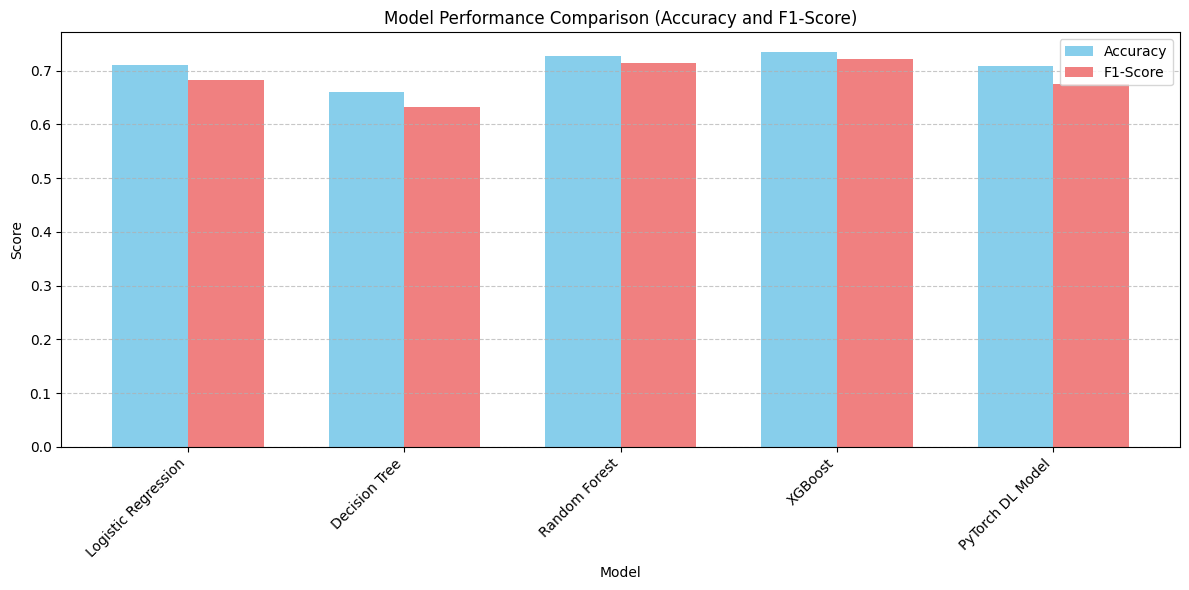

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary to store model performance metrics
model_performance = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'PyTorch DL Model'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_pytorch],
    'Precision': [precision, precision_dt, precision_rf, precision_xgb, precision_pytorch],
    'Recall': [recall, recall_dt, recall_rf, recall_xgb, recall_pytorch],
    'F1-Score': [f1, f1_dt, f1_rf, f1_xgb, f1_pytorch]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance summary
display(performance_df)

# Plotting the Accuracy and F1-Score for comparison
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(performance_df['Model']))

bar1 = ax.bar(index, performance_df['Accuracy'], bar_width, label='Accuracy', color='skyblue')
bar2 = ax.bar(index + bar_width, performance_df['F1-Score'], bar_width, label='F1-Score', color='lightcoral')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (Accuracy and F1-Score)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(performance_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Feature Importance from XGBoost Model

To understand which features are most influential in predicting the `Risk_Category`, we can examine the feature importances from the trained XGBoost model. This will provide insights into which variables the model relies on most heavily.

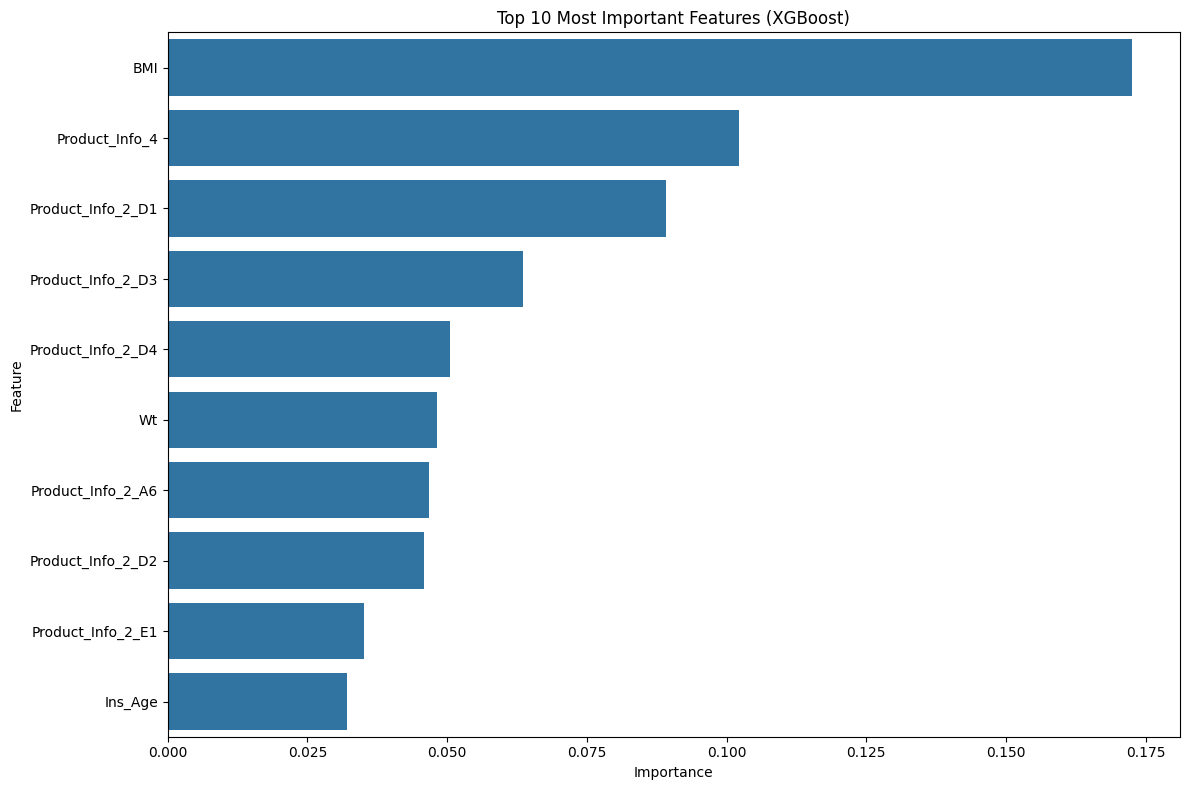

,Feature,Importance
4,BMI,0.172526
0,Product_Info_4,0.102286
23,Product_Info_2_D1,0.089109
25,Product_Info_2_D3,0.063563
26,Product_Info_2_D4,0.050479
3,Wt,0.048160
14,Product_Info_2_A6,0.046761
24,Product_Info_2_D2,0.045934
27,Product_Info_2_E1,0.035163
1,Ins_Age,0.032149


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the XGBoost model
feature_importances = model_xgb.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10))
plt.title('Top 10 Most Important Features (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

display(features_df.head(10))

### Model Performance Comparison by Metric

This visualization displays each evaluation metric on the x-axis, allowing for a direct comparison of how each model performs across a specific metric. Each group of bars represents a metric, with individual bars showing the score for each model.

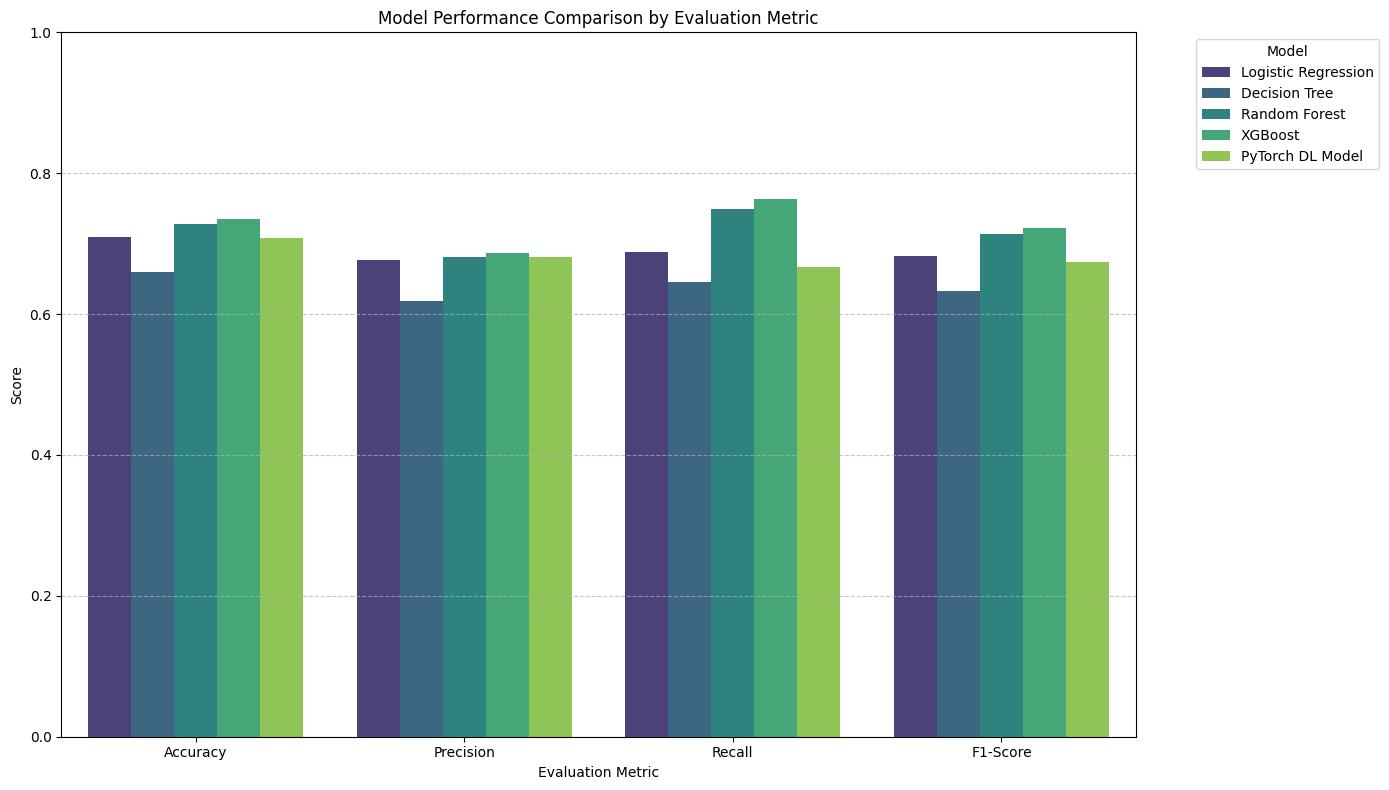

,Model,Metric,Score
0,Logistic Regression,Accuracy,0.709677
1,Decision Tree,Accuracy,0.659564
2,Random Forest,Accuracy,0.727280
3,XGBoost,Accuracy,0.734439
4,PyTorch DL Model,Accuracy,0.708077


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure performance_df is available
# (It should be from previous execution, but included for completeness)
# model_performance = {
#     'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'PyTorch DL Model'],
#     'Accuracy': [accuracy, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_pytorch],
#     'Precision': [precision, precision_dt, precision_rf, precision_xgb, precision_pytorch],
#     'Recall': [recall, recall_dt, recall_rf, recall_xgb, recall_pytorch],
#     'F1-Score': [f1, f1_dt, f1_rf, f1_xgb, f1_pytorch]
# }
# performance_df = pd.DataFrame(model_performance)

# Melt the DataFrame to have metrics as a categorical variable
melted_performance_df = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=melted_performance_df, palette='viridis')

plt.title('Model Performance Comparison by Evaluation Metric')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics are typically between 0 and 1
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

display(melted_performance_df.head())

### Partial Dependence Plots (PDP) for Top Features

A Partial Dependence Plot (PDP) shows the marginal effect of one or two features on the predicted outcome of a fitted model. It helps visualize whether the relationship between the target and a feature is linear, monotonic, or more complex. Here, we'll plot the partial dependence for the top two most important features from the XGBoost model.

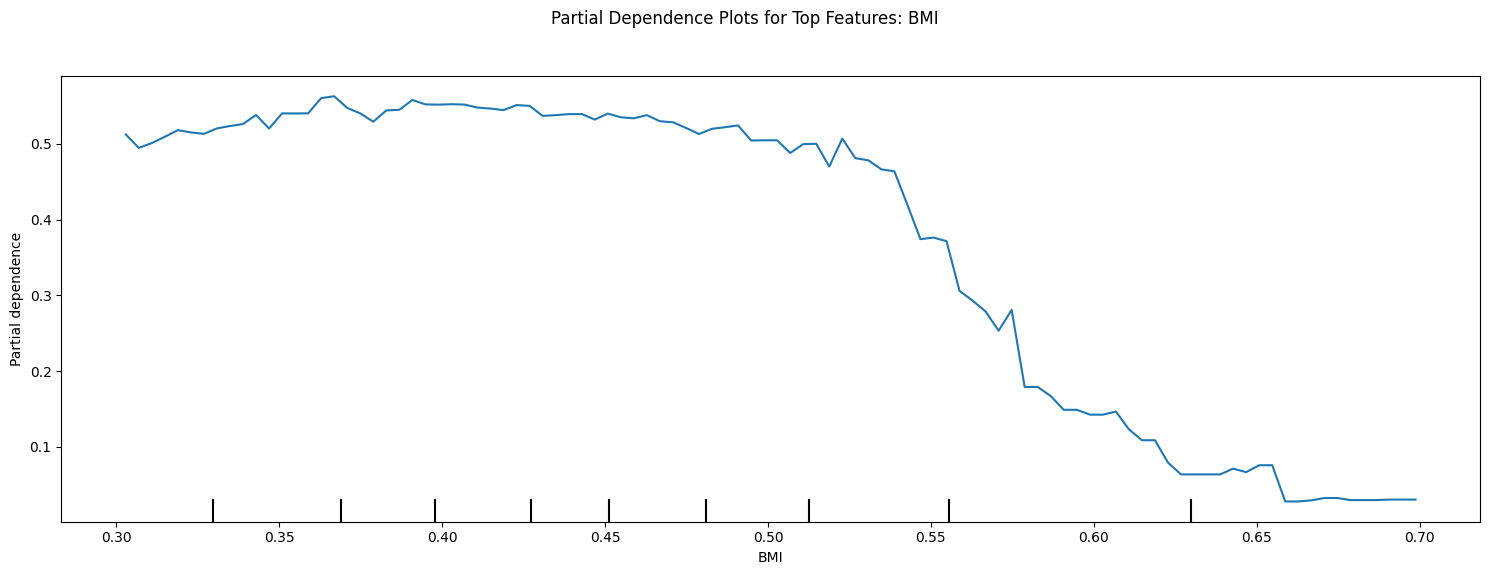

In [32]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Assuming `model_xgb` is your trained XGBoost model and `X_train` is your training features
# We'll select the top 2 features identified earlier from `features_df`

top_features = features_df['Feature'].head(1).tolist()

fig, ax = plt.subplots(figsize=(15, 6))

# Generate Partial Dependence Plots for the top 2 features
PartialDependenceDisplay.from_estimator(
    model_xgb, X_train, features=top_features,
    feature_names=X_train.columns.tolist(), ax=ax
)

plt.suptitle(f'Partial Dependence Plots for Top Features: {', '.join(top_features)}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Detailed Model Performance Comparison

This visualization compares all key performance metrics (Accuracy, Precision, Recall, and F1-Score) for each model. This allows for a more granular understanding of each model's strengths and weaknesses across different evaluation criteria.

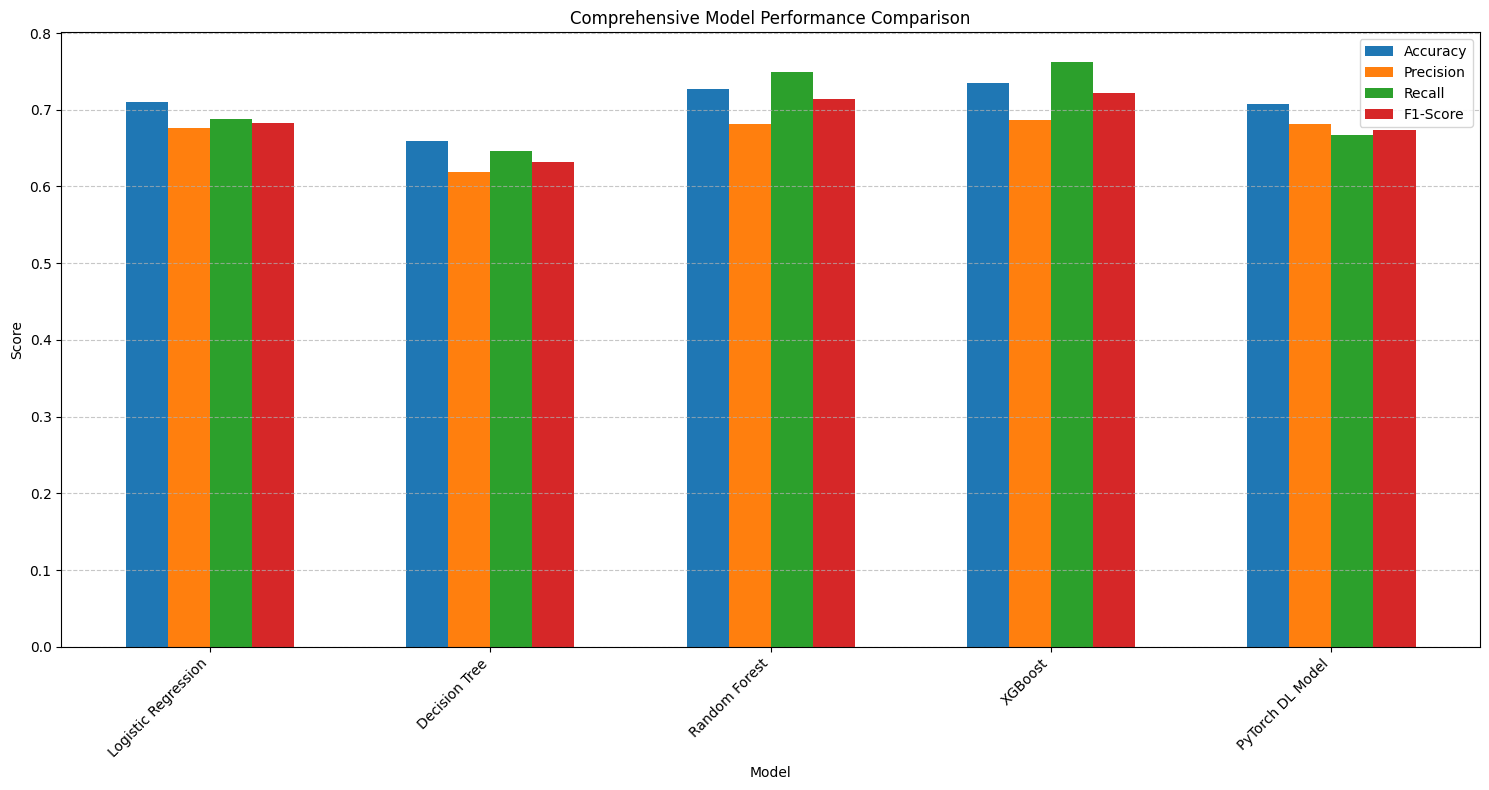

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure performance_df is available (it should be from previous execution)
# If running this cell independently, uncomment and run the following lines:
# model_performance = {
#     'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'PyTorch DL Model'],
#     'Accuracy': [accuracy, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_pytorch],
#     'Precision': [precision, precision_dt, precision_rf, precision_xgb, precision_pytorch],
#     'Recall': [recall, recall_dt, recall_rf, recall_xgb, recall_pytorch],
#     'F1-Score': [f1, f1_dt, f1_rf, f1_xgb, f1_pytorch]
# }
# performance_df = pd.DataFrame(model_performance)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
num_metrics = len(metrics)
num_models = len(performance_df['Model'])

bar_width = 0.15
index = np.arange(num_models)

fig, ax = plt.subplots(figsize=(15, 8))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, performance_df[metric], bar_width, label=metric)

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comprehensive Model Performance Comparison')
ax.set_xticks(index + bar_width * (num_metrics - 1) / 2)
ax.set_xticklabels(performance_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()